In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',500)

In [3]:
column_names = ['user_id','item_id','rating','timestamp']
dataframe = pd.read_csv('User_Data.csv',sep='\t',names=column_names)
dataframe.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movies_Title = pd.read_csv('Movie_Id_Titles.csv')
strings =[]
Title = []
for i in movies_Title['title']:
    strings.append(i[-5:-1])
    Title.append(i[0:-7])
movies_Title['Year'] = strings
movies_Title.drop('title',axis=1,inplace=True)
movies_Title['Title'] = Title
movies_Title.head()

,item_id,Year,Title
0,1,1995,Toy Story
1,2,1995,GoldenEye
2,3,1995,Four Rooms
3,4,1995,Get Shorty
4,5,1995,Copycat


In [5]:
dataframe = pd.merge(dataframe,movies_Title,on='item_id')
dataframe.head()

,user_id,item_id,rating,timestamp,Year,Title
0,0,50,5,881250949,1977,Star Wars
1,290,50,5,880473582,1977,Star Wars
2,79,50,4,891271545,1977,Star Wars
3,2,50,5,888552084,1977,Star Wars
4,8,50,5,879362124,1977,Star Wars


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:
dataframe.groupby('Title')['rating'].mean().sort_values(ascending=False)

Title
Entertaining Angels: The Dorothy Day Story    5.0
Prefontaine                                   5.0
Great Day in Harlem, A                        5.0
Star Kid                                      5.0
Aiqing wansui                                 5.0
                                             ... 
Falling in Love Again                         1.0
JLG/JLG - autoportrait de décembre            1.0
Baton Rouge                                   1.0
Invitation, The (Zaproszenie)                 1.0
Mostro, Il                                    1.0
Name: rating, Length: 1659, dtype: float64

In [16]:
dataframe.groupby('Title')['rating'].count().sort_values(ascending=False).head()

Title
Star Wars             584
Contact               509
Fargo                 508
Return of the Jedi    507
Liar Liar             485
Name: rating, dtype: int64

In [17]:
rating = pd.DataFrame(dataframe.groupby('Title')['rating'].mean())
rating['no_of_rating'] = dataframe.groupby('Title')['rating'].count()
rating.sort_values('no_of_rating',ascending=False,inplace=True)
rating.head()

,rating,no_of_rating
Title,,
Star Wars,4.359589,584
Contact,3.803536,509
Fargo,4.155512,508
Return of the Jedi,4.007890,507
Liar Liar,3.156701,485


<AxesSubplot:>

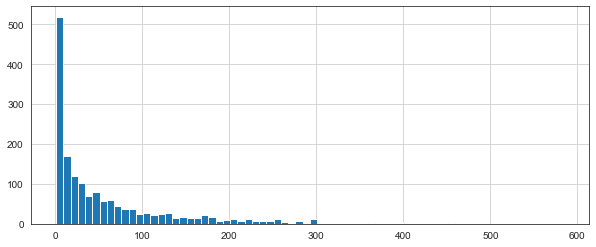

In [10]:
plt.figure(figsize=(10,4))
rating['no_of_rating'].hist(bins=70)

<AxesSubplot:>

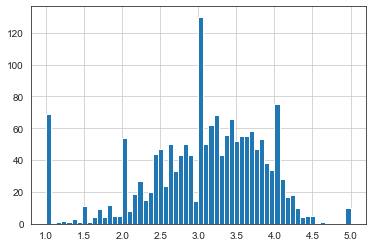

In [11]:
rating['rating'].hist(bins=60)

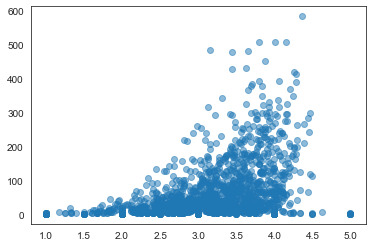

In [12]:
plt.scatter(rating['rating'],rating['no_of_rating'],alpha=0.5,)

In [13]:
moviemat = dataframe.pivot_table(values='rating',index='user_id',columns='Title')
moviemat

Title,,'Til There Was You,1-900,101 Dalmatians,12 Angry Men,187,2 Days in the Valley,"20,000 Leagues Under the Sea",2001: A Space Odyssey,3 Ninjas: High Noon At Mega Mountain,...,Wyatt Earp,Yankee Zulu,Year of the Horse,You So Crazy,Young Frankenstein,Young Guns,Young Guns II,"Young Poisoner's Handbook, The",Zeus and Roxanne,Á köldum klaka (Cold Fever)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def recommend(movie_name):
    df = pd.DataFrame(movies_Title['Title'])
    if(movie_name in df.values) == False:
        print('Enter correct movie name.')
        return 0
    else:
        movie_ratings = moviemat[movie_name]
        similar = moviemat.corrwith(movie_ratings)
        corr = pd.DataFrame(similar,columns=['Correlation'])
        corr.dropna(inplace=True)
        corr['no_of_ratings'] = rating['no_of_rating']
        output = pd.DataFrame(corr[corr['no_of_ratings']>100].sort_values('Correlation',ascending=False).head())
        print('Title: ',end=' ')
        for i in output.index:
            print(i)


In [15]:
recommend('Star Wars')

Title:  Star Wars
Empire Strikes Back, The
Return of the Jedi
Raiders of the Lost Ark
Austin Powers: International Man of Mystery
